In [ ]:

import numpy as np
import matplotlib.pyplot as plt

from neuralnetlib.preprocessing import StandardScaler
from neuralnetlib.preprocessing import PCA, TSNE
from neuralnetlib.learners import KMeans, DBSCAN
from neuralnetlib.utils import make_blobs

from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

## PCA

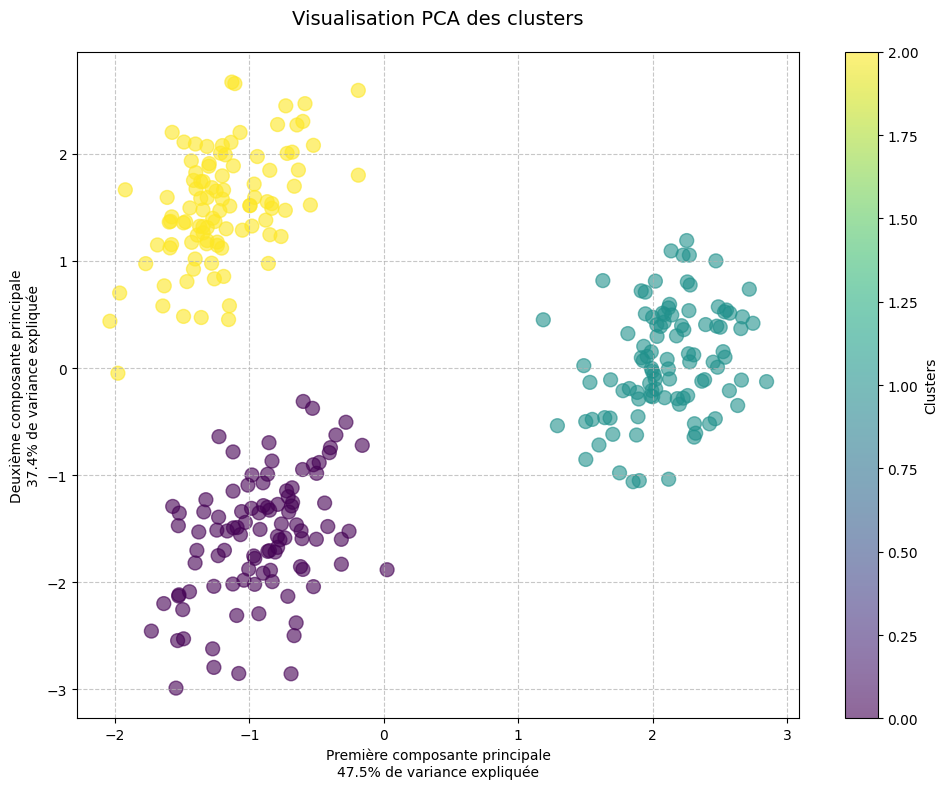

Variance totale expliquée par les 2 premières composantes : 84.9%


In [10]:
n_samples = 300
n_features = 5
n_clusters = 3

X, y = make_blobs(n_samples=n_samples, 
                  n_features=n_features, 
                  centers=n_clusters,
                  cluster_std=1.5,
                  random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], 
                     c=y, 
                     cmap='viridis', 
                     alpha=0.6,
                     s=100)

plt.title('Visualisation PCA des clusters', fontsize=14, pad=20)
plt.xlabel(f'Première composante principale\n{pca.explained_variance_ratio[0]:.1%} de variance expliquée')
plt.ylabel(f'Deuxième composante principale\n{pca.explained_variance_ratio[1]:.1%} de variance expliquée')

plt.grid(True, linestyle='--', alpha=0.7)

plt.colorbar(scatter, label='Clusters')

plt.tight_layout()

plt.show()

print(f"Variance totale expliquée par les 2 premières composantes : {sum(pca.explained_variance_ratio):.1%}")

## t-SNE

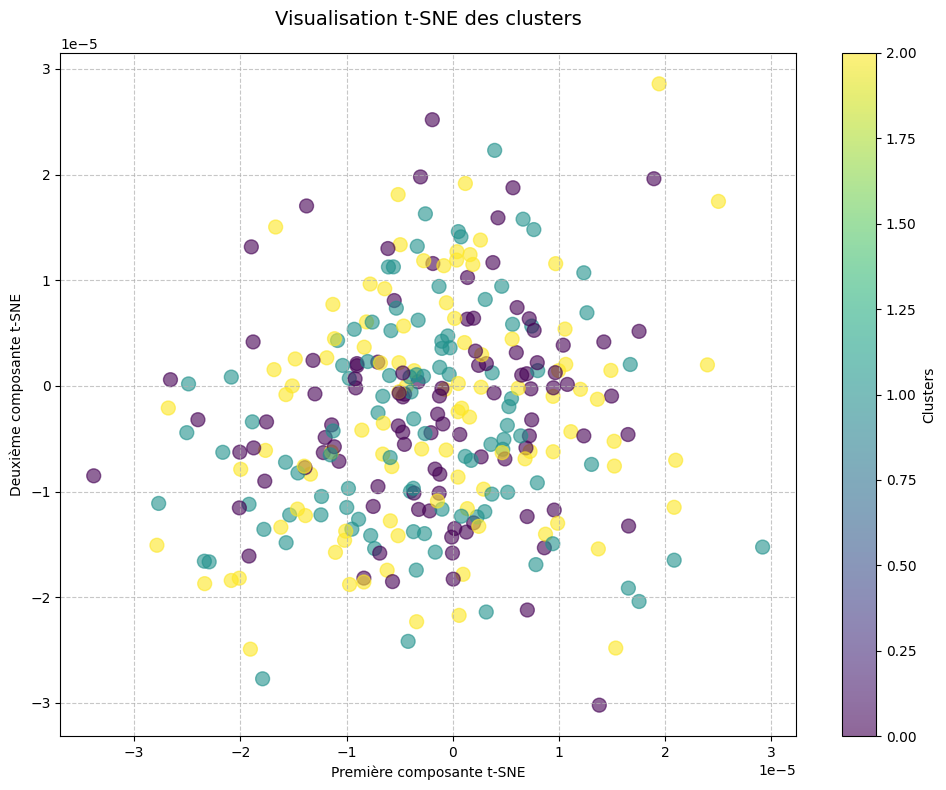

In [11]:
n_samples = 300
n_features = 5
n_clusters = 3

X, y = make_blobs(n_samples=n_samples, 
                  n_features=n_features, 
                  centers=n_clusters,
                  cluster_std=1.5,
                  random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

tsne = TSNE(n_components=2,
            perplexity=30,
            random_state=42,
            n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1],
                     c=y,
                     cmap='viridis',
                     alpha=0.6,
                     s=100)

plt.title('Visualisation t-SNE des clusters', fontsize=14, pad=20)
plt.xlabel('Première composante t-SNE')
plt.ylabel('Deuxième composante t-SNE')

plt.grid(True, linestyle='--', alpha=0.7)

plt.colorbar(scatter, label='Clusters')

plt.tight_layout()
plt.show()

## K-means

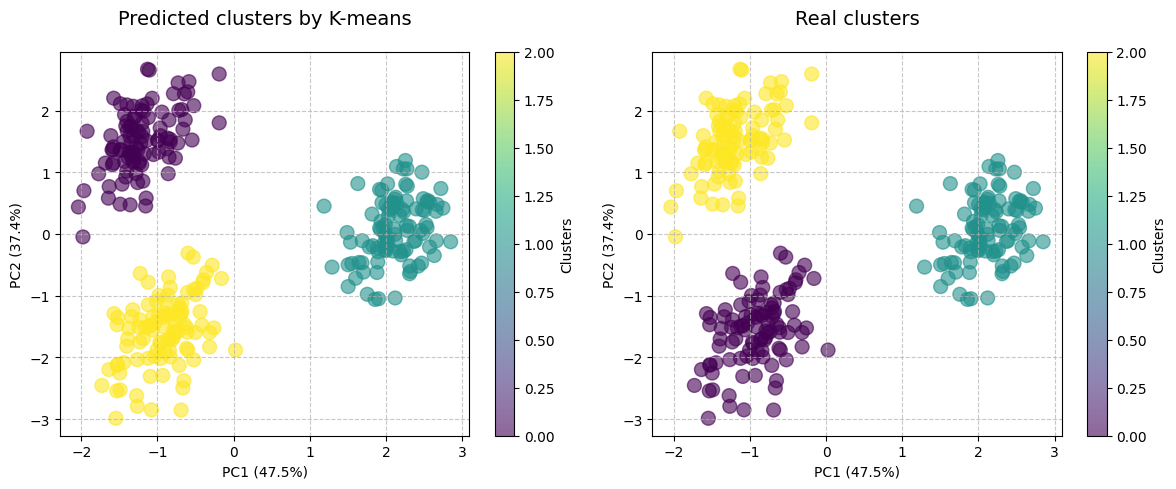

In [12]:
n_samples = 300
n_features = 5
n_clusters = 3

X, y = make_blobs(n_samples=n_samples, 
                  n_features=n_features, 
                  centers=n_clusters,
                  cluster_std=1.5,
                  random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=n_clusters, 
                random_state=42)
y_pred = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 5))

plt.subplot(121)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], 
                     c=y_pred,
                     cmap='viridis', 
                     alpha=0.6,
                     s=100)

plt.title('Predicted clusters by K-means', fontsize=14, pad=20)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio[0]:.1%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio[1]:.1%})')
plt.grid(True, linestyle='--', alpha=0.7)
plt.colorbar(scatter, label='Clusters')

plt.subplot(122)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], 
                     c=y,
                     cmap='viridis', 
                     alpha=0.6,
                     s=100)

plt.title('Real clusters', fontsize=14, pad=20)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio[0]:.1%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio[1]:.1%})')
plt.grid(True, linestyle='--', alpha=0.7)
plt.colorbar(scatter, label='Clusters')

plt.tight_layout()
plt.show()

In [13]:
print(f"Adjusted Rand Score: {adjusted_rand_score(y, y_pred):.3f}")
print(f"Adjusted Mutual Information Score: {adjusted_mutual_info_score(y, y_pred):.3f}")

print("\nCluster Centers (after de-standardization):")
cluster_centers = scaler.inverse_transform(kmeans.learners_centers_)
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i}: {center}")

Adjusted Rand Score: 1.000
Adjusted Mutual Information Score: 1.000

Cluster Centers (after de-standardization):
Cluster 0: [-9.6110271   9.45767641  6.68079594 -5.77801341 -6.40903172]
Cluster 1: [-6.74966512 -8.91197427  7.21296379  1.96621142  4.09792581]
Cluster 2: [-2.54763352  9.1189352   4.77783016  2.11967281 -6.70523894]


## DBSCAN

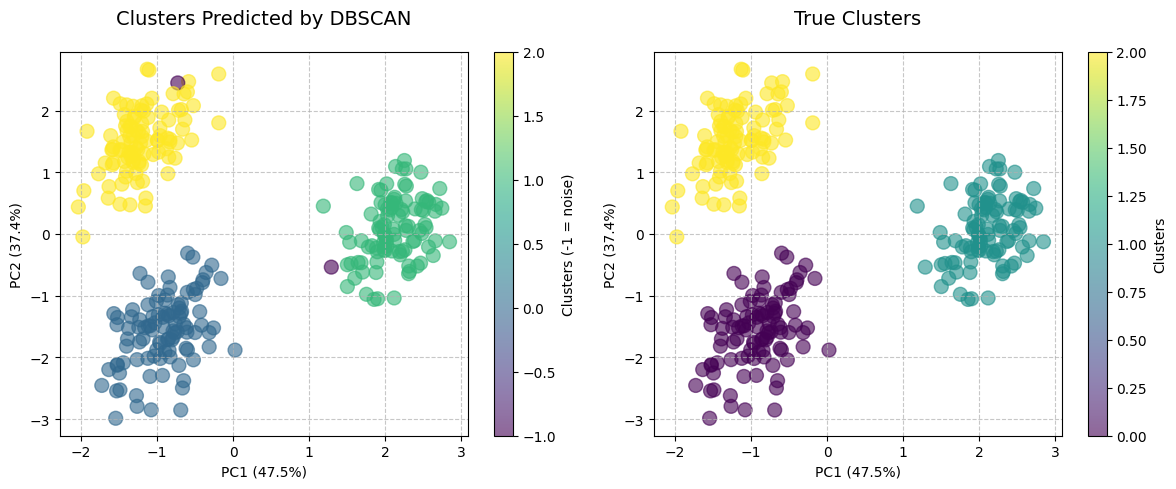

In [16]:
n_samples = 300
n_features = 5
n_clusters = 3

X, y = make_blobs(n_samples=n_samples, 
                  n_features=n_features, 
                  centers=n_clusters,
                  cluster_std=1.5,
                  random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=1,
                min_samples=5,
                metric='euclidean')
y_pred = dbscan.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualization
plt.figure(figsize=(12, 5))

plt.subplot(121)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], 
                     c=y_pred,
                     cmap='viridis', 
                     alpha=0.6,
                     s=100)

plt.title('Clusters Predicted by DBSCAN', fontsize=14, pad=20)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio[0]:.1%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio[1]:.1%})')
plt.grid(True, linestyle='--', alpha=0.7)
plt.colorbar(scatter, label='Clusters (-1 = noise)')

plt.subplot(122)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], 
                     c=y,
                     cmap='viridis', 
                     alpha=0.6,
                     s=100)

plt.title('True Clusters', fontsize=14, pad=20)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio[0]:.1%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio[1]:.1%})')
plt.grid(True, linestyle='--', alpha=0.7)
plt.colorbar(scatter, label='Clusters')

plt.tight_layout()
plt.show()

In [17]:
print(f"Adjusted Rand Score: {adjusted_rand_score(y, y_pred):.3f}")
print(f"Adjusted Mutual Information Score: {adjusted_mutual_info_score(y, y_pred):.3f}")

n_clusters_ = len(set(y_pred)) - (1 if -1 in y_pred else 0)
n_noise_ = list(y_pred).count(-1)

print(f"\nEstimated number of clusters: {n_clusters_}")
print(f"Number of points considered as noise: {n_noise_}")
print(f"Points per cluster:")
for i in range(n_clusters_):
    print(f"Cluster {i}: {list(y_pred).count(i)} points")


Adjusted Rand Score: 0.990
Adjusted Mutual Information Score: 0.981

Estimated number of clusters: 3
Number of points considered as noise: 2
Points per cluster:
Cluster 0: 100 points
Cluster 1: 99 points
Cluster 2: 99 points
